## Trabajo Arboles de decisión
## William David Arias amaya
## 1. Realizar un análisis exploratorio de los datos para identificar
## relaciones entre variables, valores atípicos, tendencias, etc.
## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
## 5. Entrenar el modelo configurando los diferentes hiperparámetros.
## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
## 8. Interpretar, analizar y documentar los resultados obtenidos.


In [64]:
#Importe de librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargamos el dataset con vista de filas
data = pd.read_csv("C:/Tarea_3_An/winequality_red/winequality_red.CSV")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape


(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

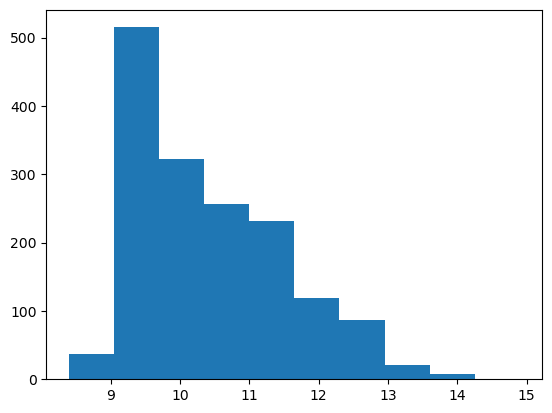

In [11]:
plt.hist(data.alcohol)

<Axes: xlabel='density', ylabel='sulphates'>

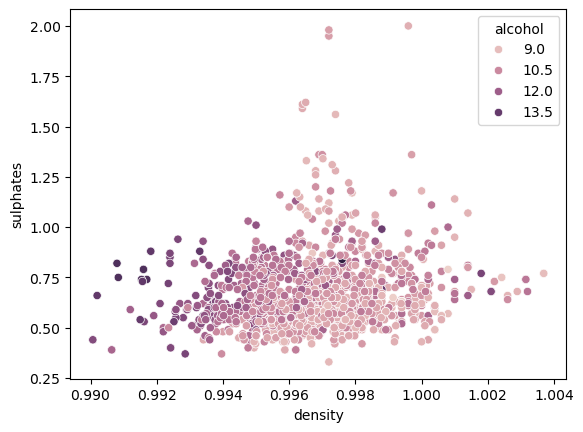

In [16]:
sns.scatterplot(x = "density", y = "sulphates", hue = "alcohol", data = data)

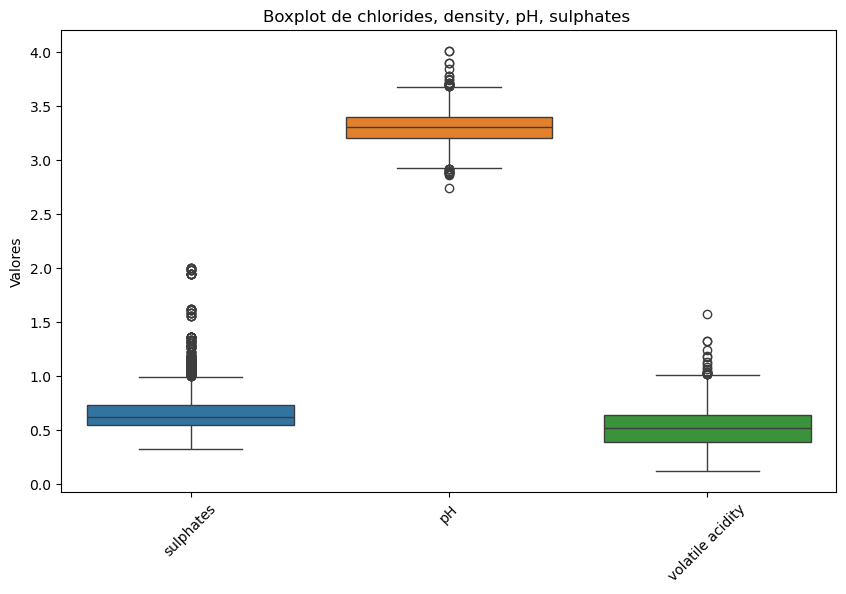

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sulphates', 'pH', 'sulphates', 'volatile acidity']])
plt.xticks(rotation=45)
plt.title('Boxplot de chlorides, density, pH, sulphates ')
plt.ylabel('Valores')
plt.show()

In [146]:
predictors_col = ["residual sugar", "fixed acidity", "quality", "alcohol"]
target_col = ['quality']

In [148]:
predictors = data[predictors_col]
target = data[target_col]

In [150]:
predictors

,residual sugar,fixed acidity,quality,alcohol
0,1.9,7.4,5,9.4
1,2.6,7.8,5,9.8
2,2.3,7.8,5,9.8
3,1.9,11.2,6,9.8
4,1.9,7.4,5,9.4
...,...,...,...,...
1594,2.0,6.2,5,10.5
1595,2.2,5.9,6,11.2
1596,2.3,6.3,6,11.0
1597,2.0,5.9,5,10.2


In [152]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [154]:
corr = predictors.corr()
corr

,residual sugar,fixed acidity,quality,alcohol
residual sugar,1.000000,0.114777,0.013732,0.042075
fixed acidity,0.114777,1.000000,0.124052,-0.061668
quality,0.013732,0.124052,1.000000,0.476166
alcohol,0.042075,-0.061668,0.476166,1.000000


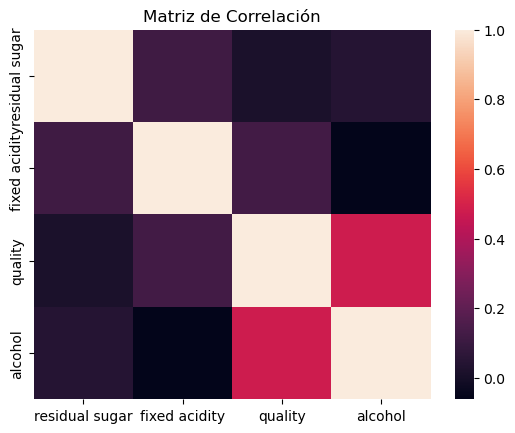

In [156]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=0)

In [160]:
tree = DecisionTreeClassifier()

In [162]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[2] <= 5.5\ngini = 0.646\nsamples = 1199\nvalue = [8.0, 39.0, 512.0, 468.0, 159.0, 13.0]'),
 Text(0.3, 0.625, 'x[2] <= 4.5\ngini = 0.156\nsamples = 559\nvalue = [8, 39, 512, 0, 0, 0]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[2] <= 3.5\ngini = 0.282\nsamples = 47\nvalue = [8, 39, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 512\nvalue = [0, 0, 512, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[2] <= 6.5\ngini = 0.403\nsamples = 640\nvalue = [0, 0, 0, 468, 159, 13]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 468\nvalue = [0, 0, 0, 468, 0, 0]'),
 Text(0.8, 0.375, 'x[2] <= 7.5\ngini = 0.14\nsamples = 172\nvalue = [0, 0, 0, 0, 159, 13]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 159\nvalue = [0, 0, 0, 0, 159, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 13]'

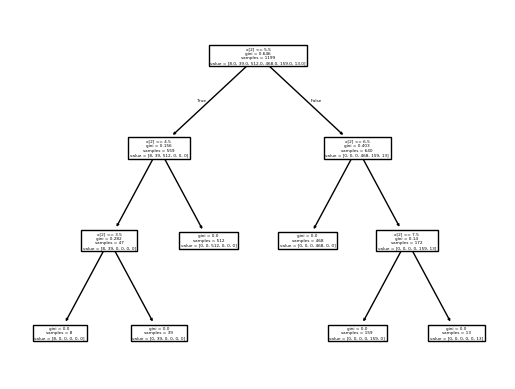

In [164]:
plot_tree(arbol)

In [166]:
predicciones = arbol.predict(X_test)

In [168]:
predicciones

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [170]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,2,0,0,0,0,0
4,0,14,0,0,0,0
5,0,0,169,0,0,0
6,0,0,0,170,0,0
7,0,0,0,0,40,0
8,0,0,0,0,0,5


In [172]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [174]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [176]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0